In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
store_data=pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")
store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
store_data.shape

(10841, 13)

In [4]:
store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
store_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
store_data.dropna(how ='any', inplace = True)

In [8]:
store_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
store_data['Rating'].mean()

4.191837606837612

#### Most of the Google Store apps haves 4.2 ratings

## Average Rating in Google Play Store

<AxesSubplot:xlabel='Rating', ylabel='Density'>

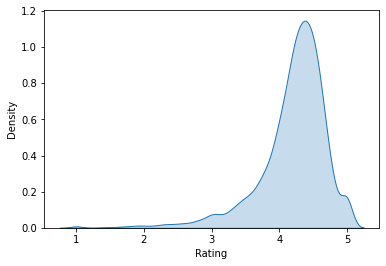

In [10]:
sns.kdeplot(store_data['Rating'],shade=True)

## Application Category in Google Play Store

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='count'>

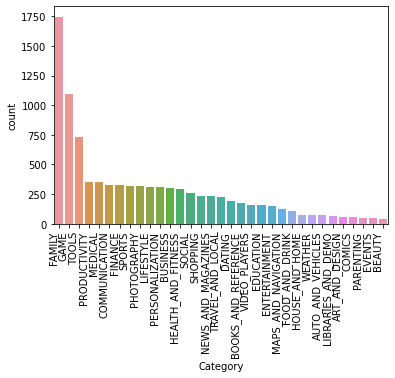

In [11]:
category_graph = sns.countplot(store_data['Category'], order=store_data['Category'].value_counts().index)
category_graph.set_xticklabels(category_graph.get_xticklabels(), rotation=90, ha="right")
category_graph

#### Family Category have most popular categroy in Google Play Store 

### Top 20 Application Genres in Google Play Store

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Genres', ylabel='count'>

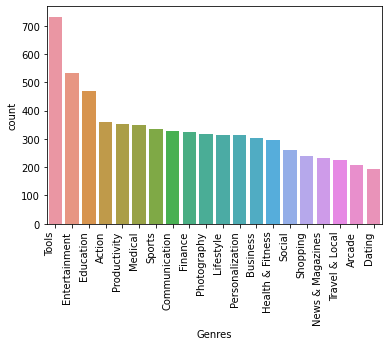

In [12]:
genres_graph = sns.countplot(store_data['Genres'], order=store_data['Genres'].value_counts()[:20].index.tolist())
genres_graph.set_xticklabels(genres_graph .get_xticklabels(), rotation=90, ha="right")
genres_graph 

## % of Free application in Google App Store

In [13]:
free_app=len(store_data[store_data['Type']=='Free'])
nonfree_app=len(store_data[store_data['Type']!='Free'])

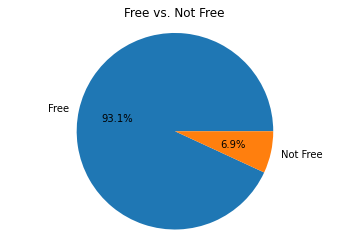

In [14]:
App_Price = [free_app,nonfree_app]
labels = 'Free','Not Free'
plt.pie(App_Price,labels=labels,autopct='%1.1f%%')
plt.title('Free vs. Not Free')
plt.axis('equal')
plt.show()

#### 93% of application in Google Play Store are Free.

## Reviews vs. Rating

In [15]:
store_data['Reviews'] = store_data['Reviews'].apply(lambda x: int(x))

<Figure size 720x720 with 0 Axes>

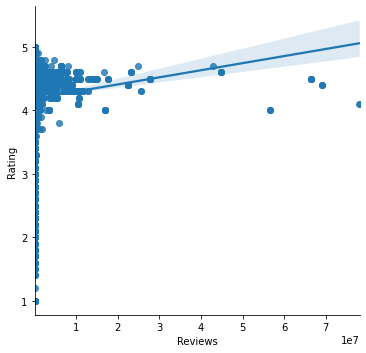

In [16]:
plt.figure(figsize = (10,10))
sns.lmplot(x="Reviews", y="Rating", data=store_data)

### Content Rating vs. Rating 

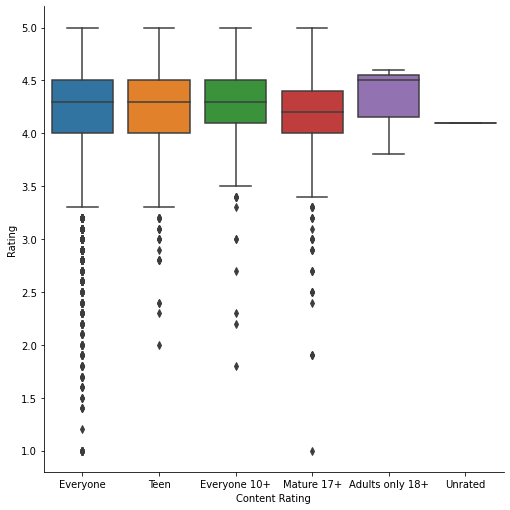

In [17]:
sns.catplot(x="Content Rating",y="Rating",data=store_data, kind="box", height = 7)

## Install vs. Rating

In [18]:
store_data['Installs']=store_data['Installs'].apply(lambda x: x.replace('+',''))
store_data['Installs']=store_data['Installs'].apply(lambda x: x.replace(',',''))
store_data['Installs']=store_data['Installs'].apply(lambda x: int(x))

<Figure size 720x720 with 0 Axes>

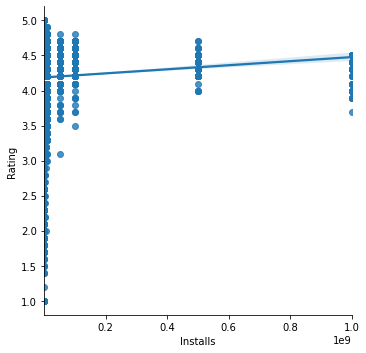

In [19]:
plt.figure(figsize = (10,10))
sns.lmplot(x="Installs", y="Rating", data=store_data)

In [20]:
store_data['Price']=store_data['Price'].apply(lambda x: x.replace('$',''))
store_data['Price']=store_data['Price'].apply(lambda x: float(x))

## Price vs. Rating

<Figure size 720x720 with 0 Axes>

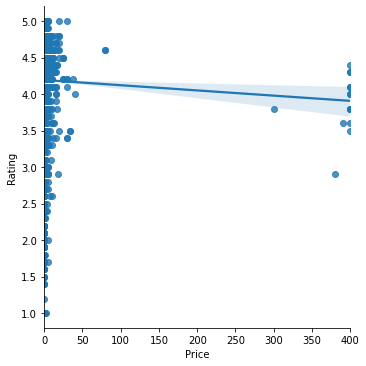

In [21]:
plt.figure(figsize = (10,10))
sns.lmplot(x="Price", y="Rating", data=store_data)

### Updated Date vs. Rating

In [22]:
store_data['recent_update']=(pd.to_datetime(store_data['Last Updated'])-max(pd.to_datetime(store_data['Last Updated']))).dt.days
store_data['recent_update']

0        -213
1        -205
2          -7
3         -61
4         -49
         ... 
10834    -416
10836    -379
10837     -33
10839   -1297
10840     -14
Name: recent_update, Length: 9360, dtype: int64

<Figure size 720x720 with 0 Axes>

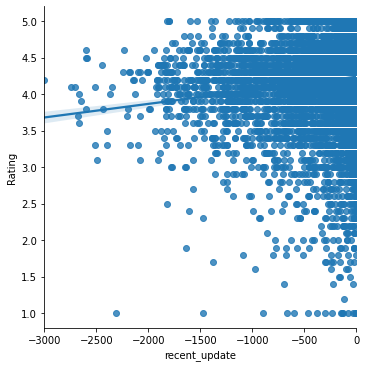

In [23]:
plt.figure(figsize = (10,10))
sns.lmplot(x="recent_update", y="Rating", data=store_data)

In [24]:
review_data=pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [25]:
review_data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [26]:
review_data.dropna(how ='any', inplace = True)

In [27]:
review_data.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [28]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

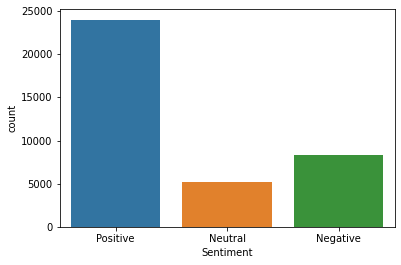

In [29]:
sns.countplot(review_data['Sentiment'])

In [30]:
positive_data= review_data[review_data['Sentiment']=='Positive']
neutral_data= review_data[review_data['Sentiment']=='Neutral']
negative_data= review_data[review_data['Sentiment']=='Negative']

In [31]:
print(len(positive_data))
print(len(neutral_data))
print(len(negative_data))

23998
5158
8271


In [32]:
positive_review = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(positive_data['Translated_Review'])))

neutral_review = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(neutral_data['Translated_Review'])))

negative_review = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(negative_data['Translated_Review'])))

## WordCloud of type of reviews

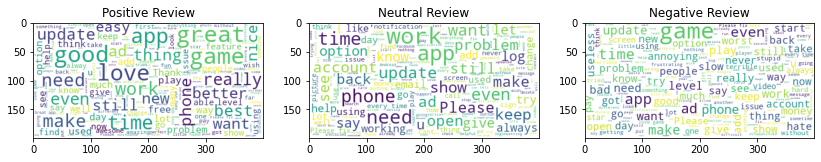

In [33]:
fig, axs = plt.subplots(1,3, figsize = (14,7))
axs[0].set_title("Positive Review")
axs[0].imshow(positive_review)

axs[1].set_title("Neutral Review")
axs[1].imshow(neutral_review)

axs[2].set_title("Negative Review")
axs[2].imshow(negative_review)

In [34]:
positive_review_data=str(list(positive_data['Translated_Review'])).lower().split()
positive_review_dataset=[word for word in positive_review_data if not word in str(set(STOPWORDS))]

neutral_review_data=str(list(neutral_data['Translated_Review'])).lower().split()
neutral_review_dataset=[word for word in neutral_review_data if not word in str(set(STOPWORDS))]

negative_review_data=str(list(negative_data['Translated_Review'])).lower().split()
negative_review_dataset=[word for word in negative_review_data if not word in str(set(STOPWORDS))]

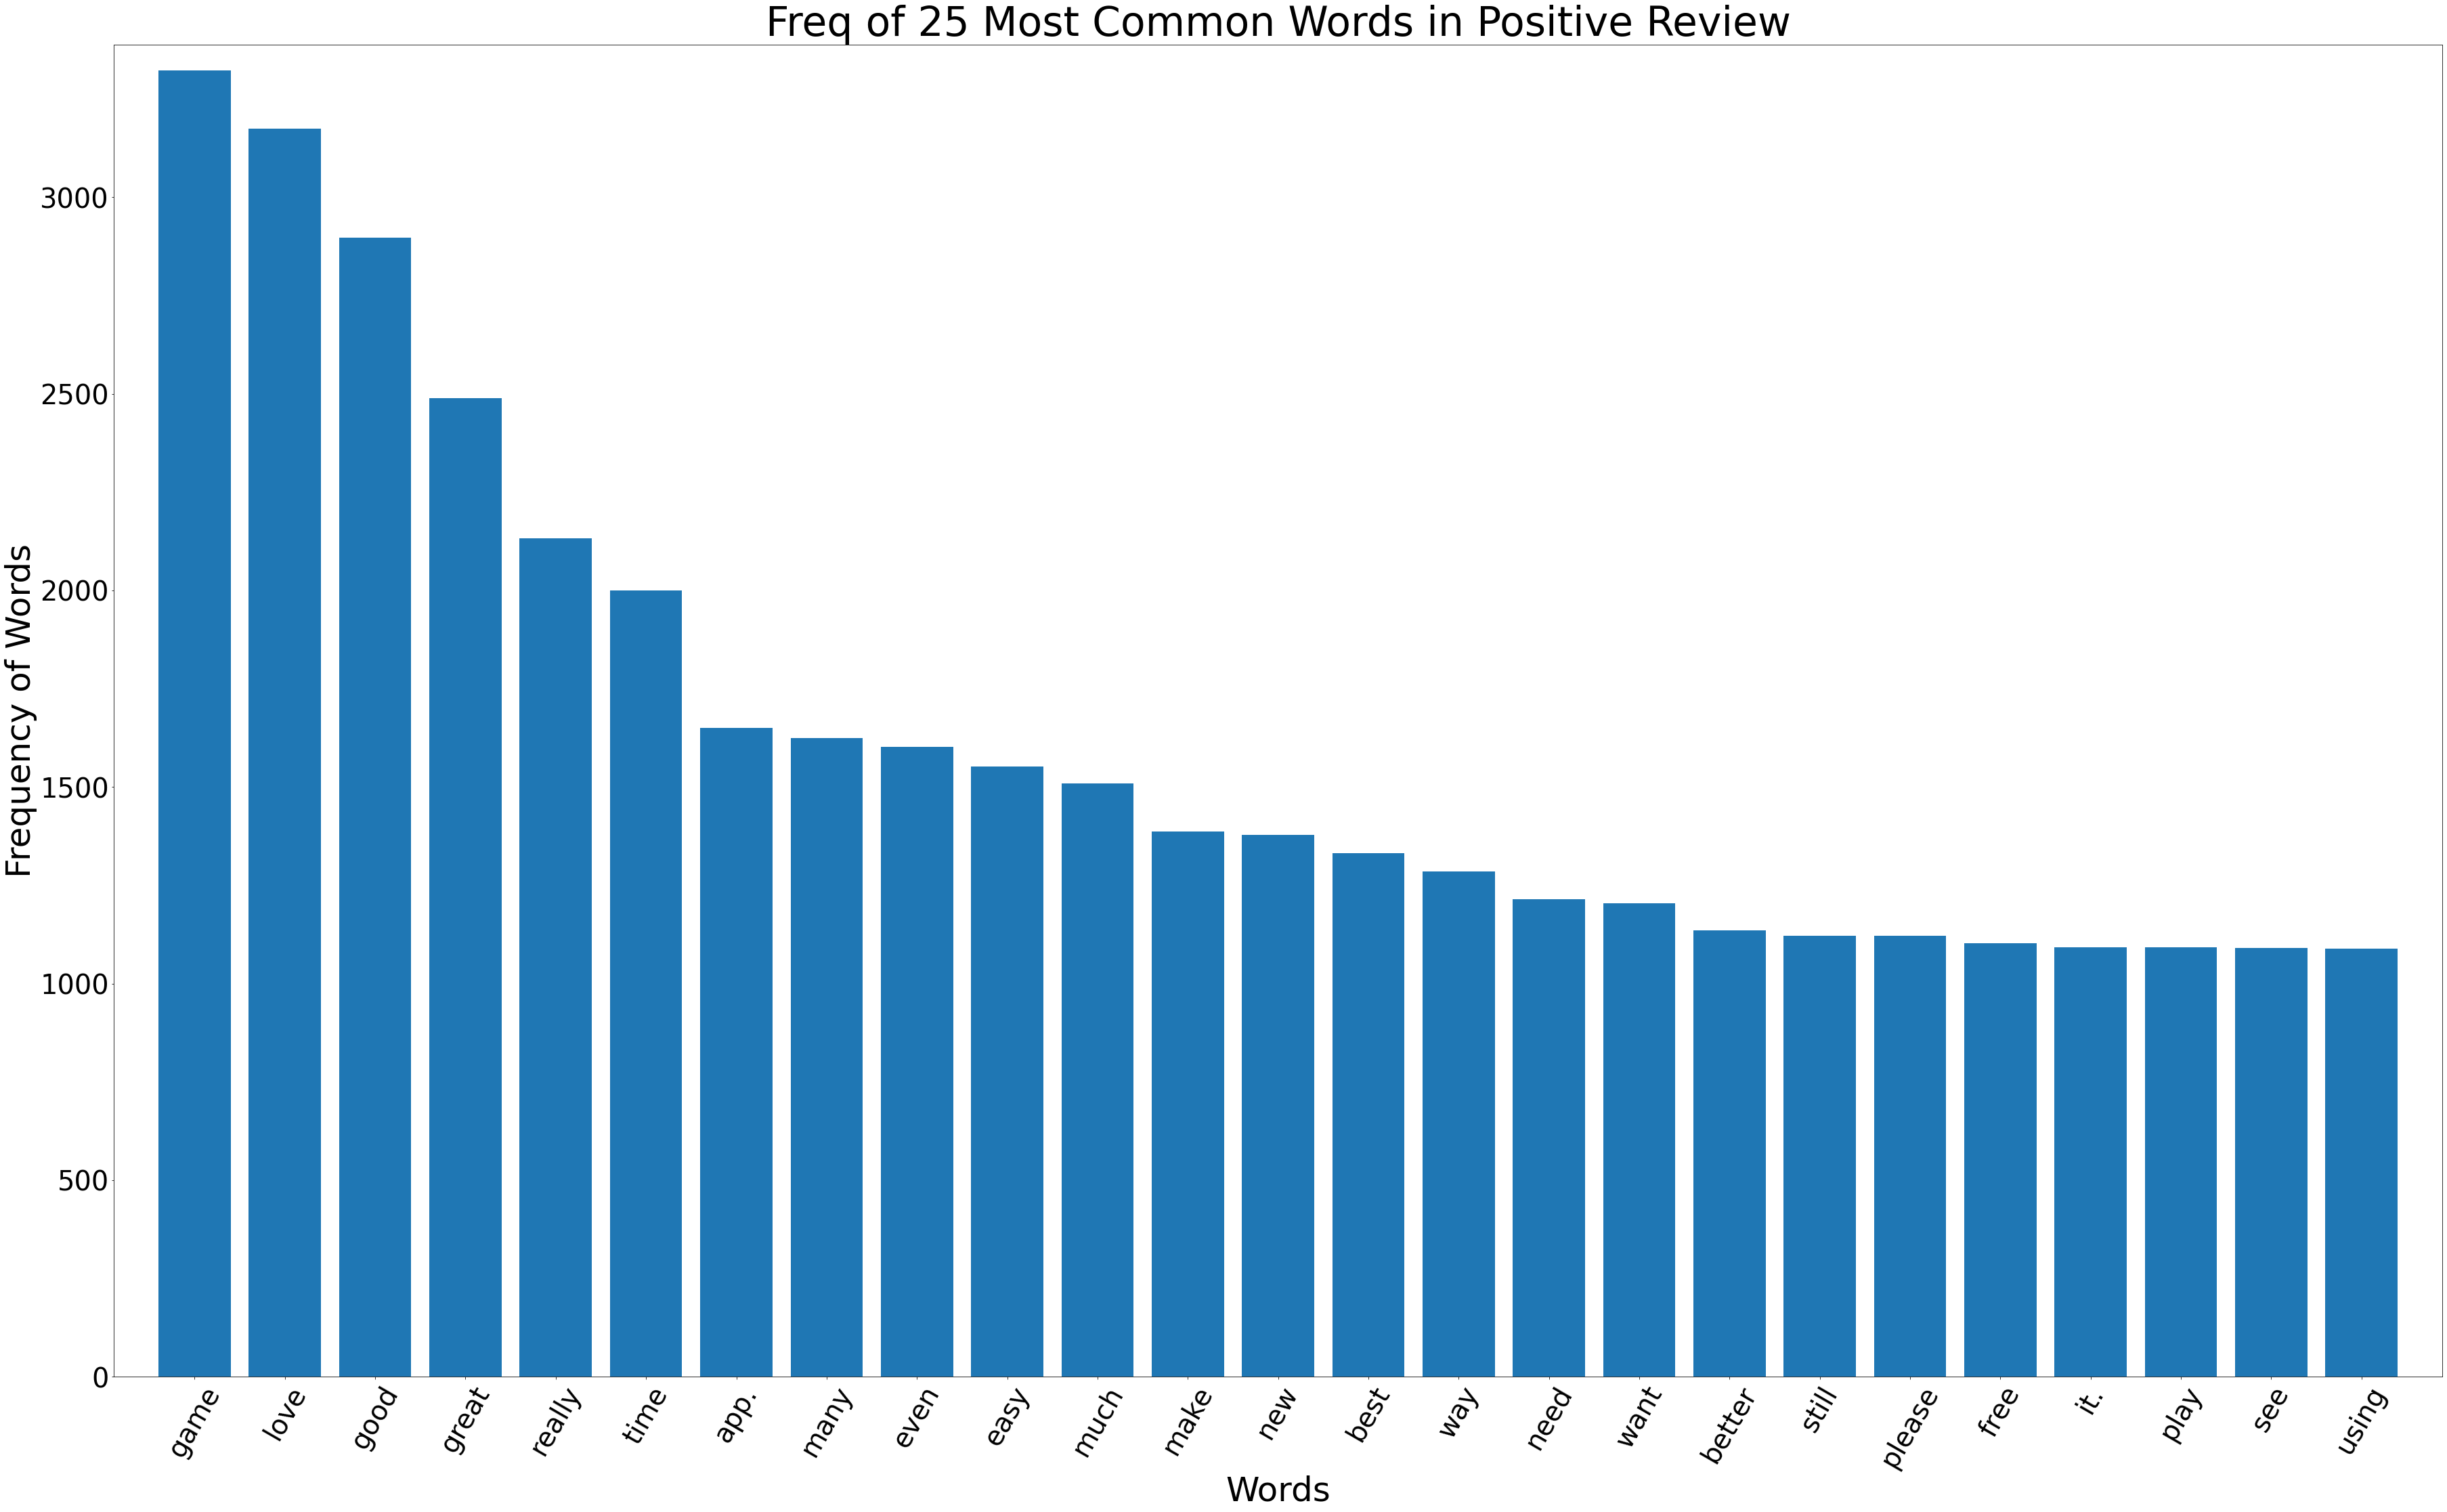

In [35]:
x,y = zip(*Counter(positive_review_dataset).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Positive Review', fontsize=60)
plt.show()

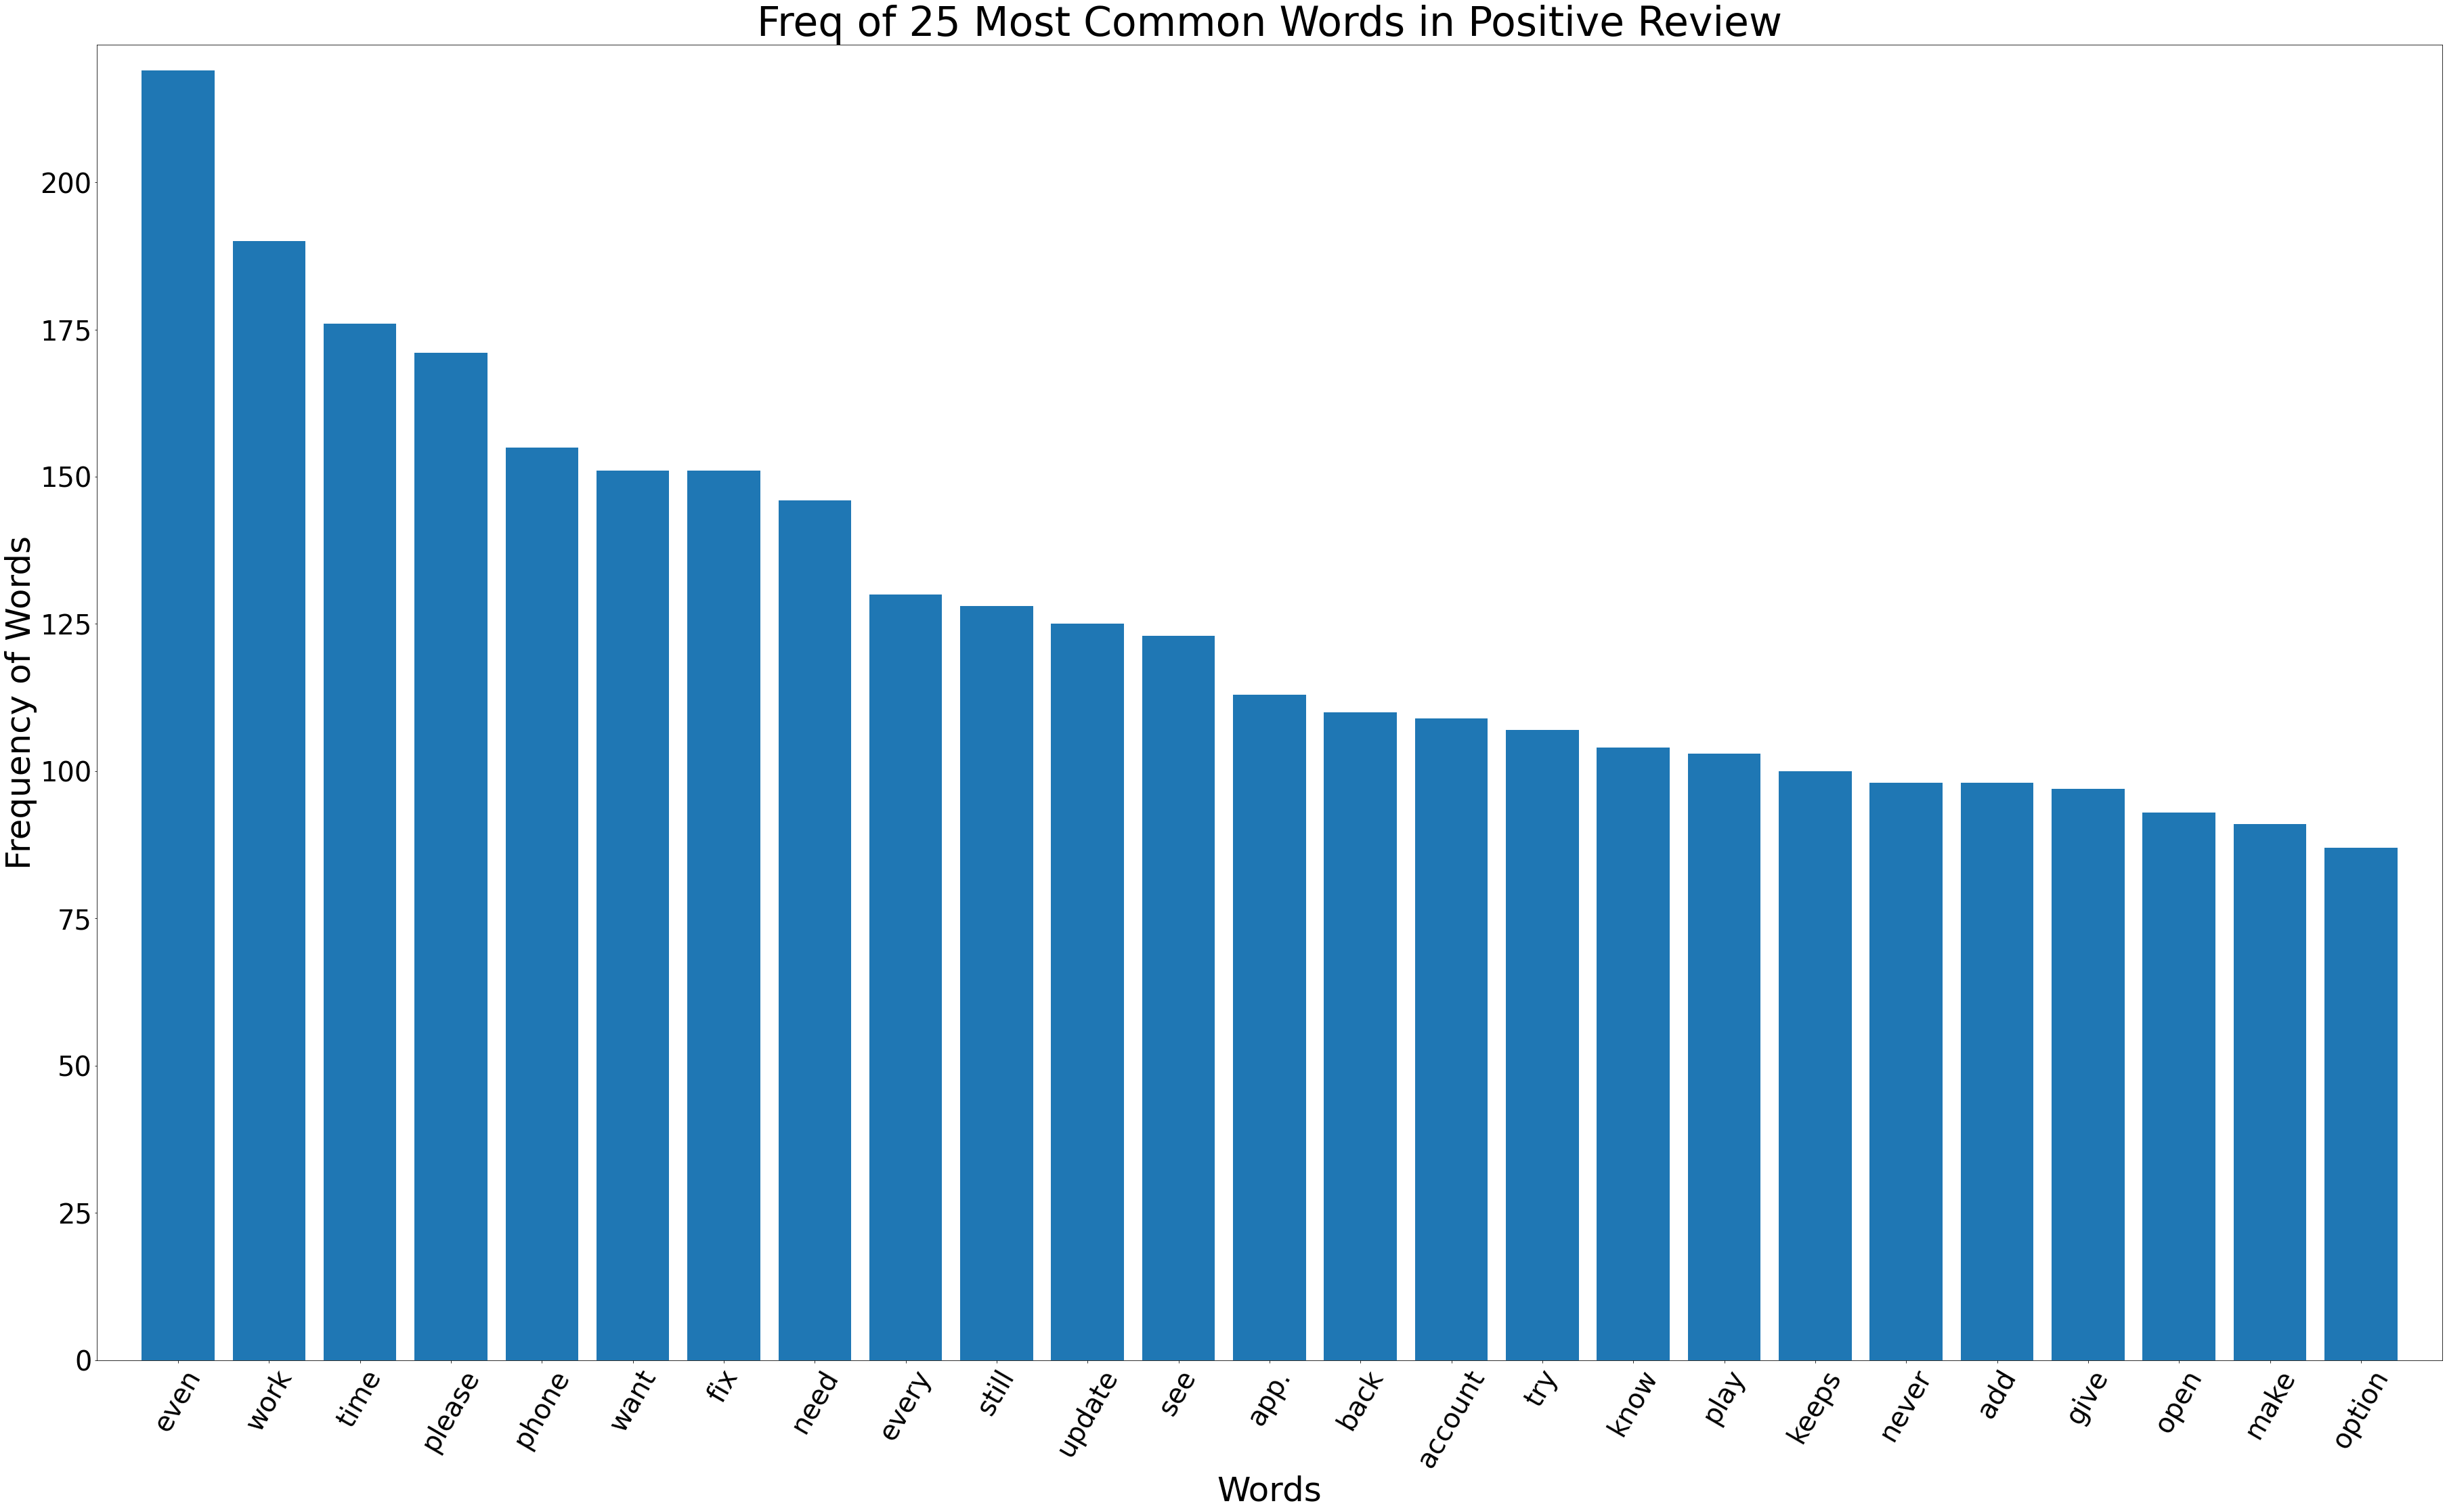

In [36]:
x,y = zip(*Counter(neutral_review_dataset).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Positive Review', fontsize=60)
plt.show()

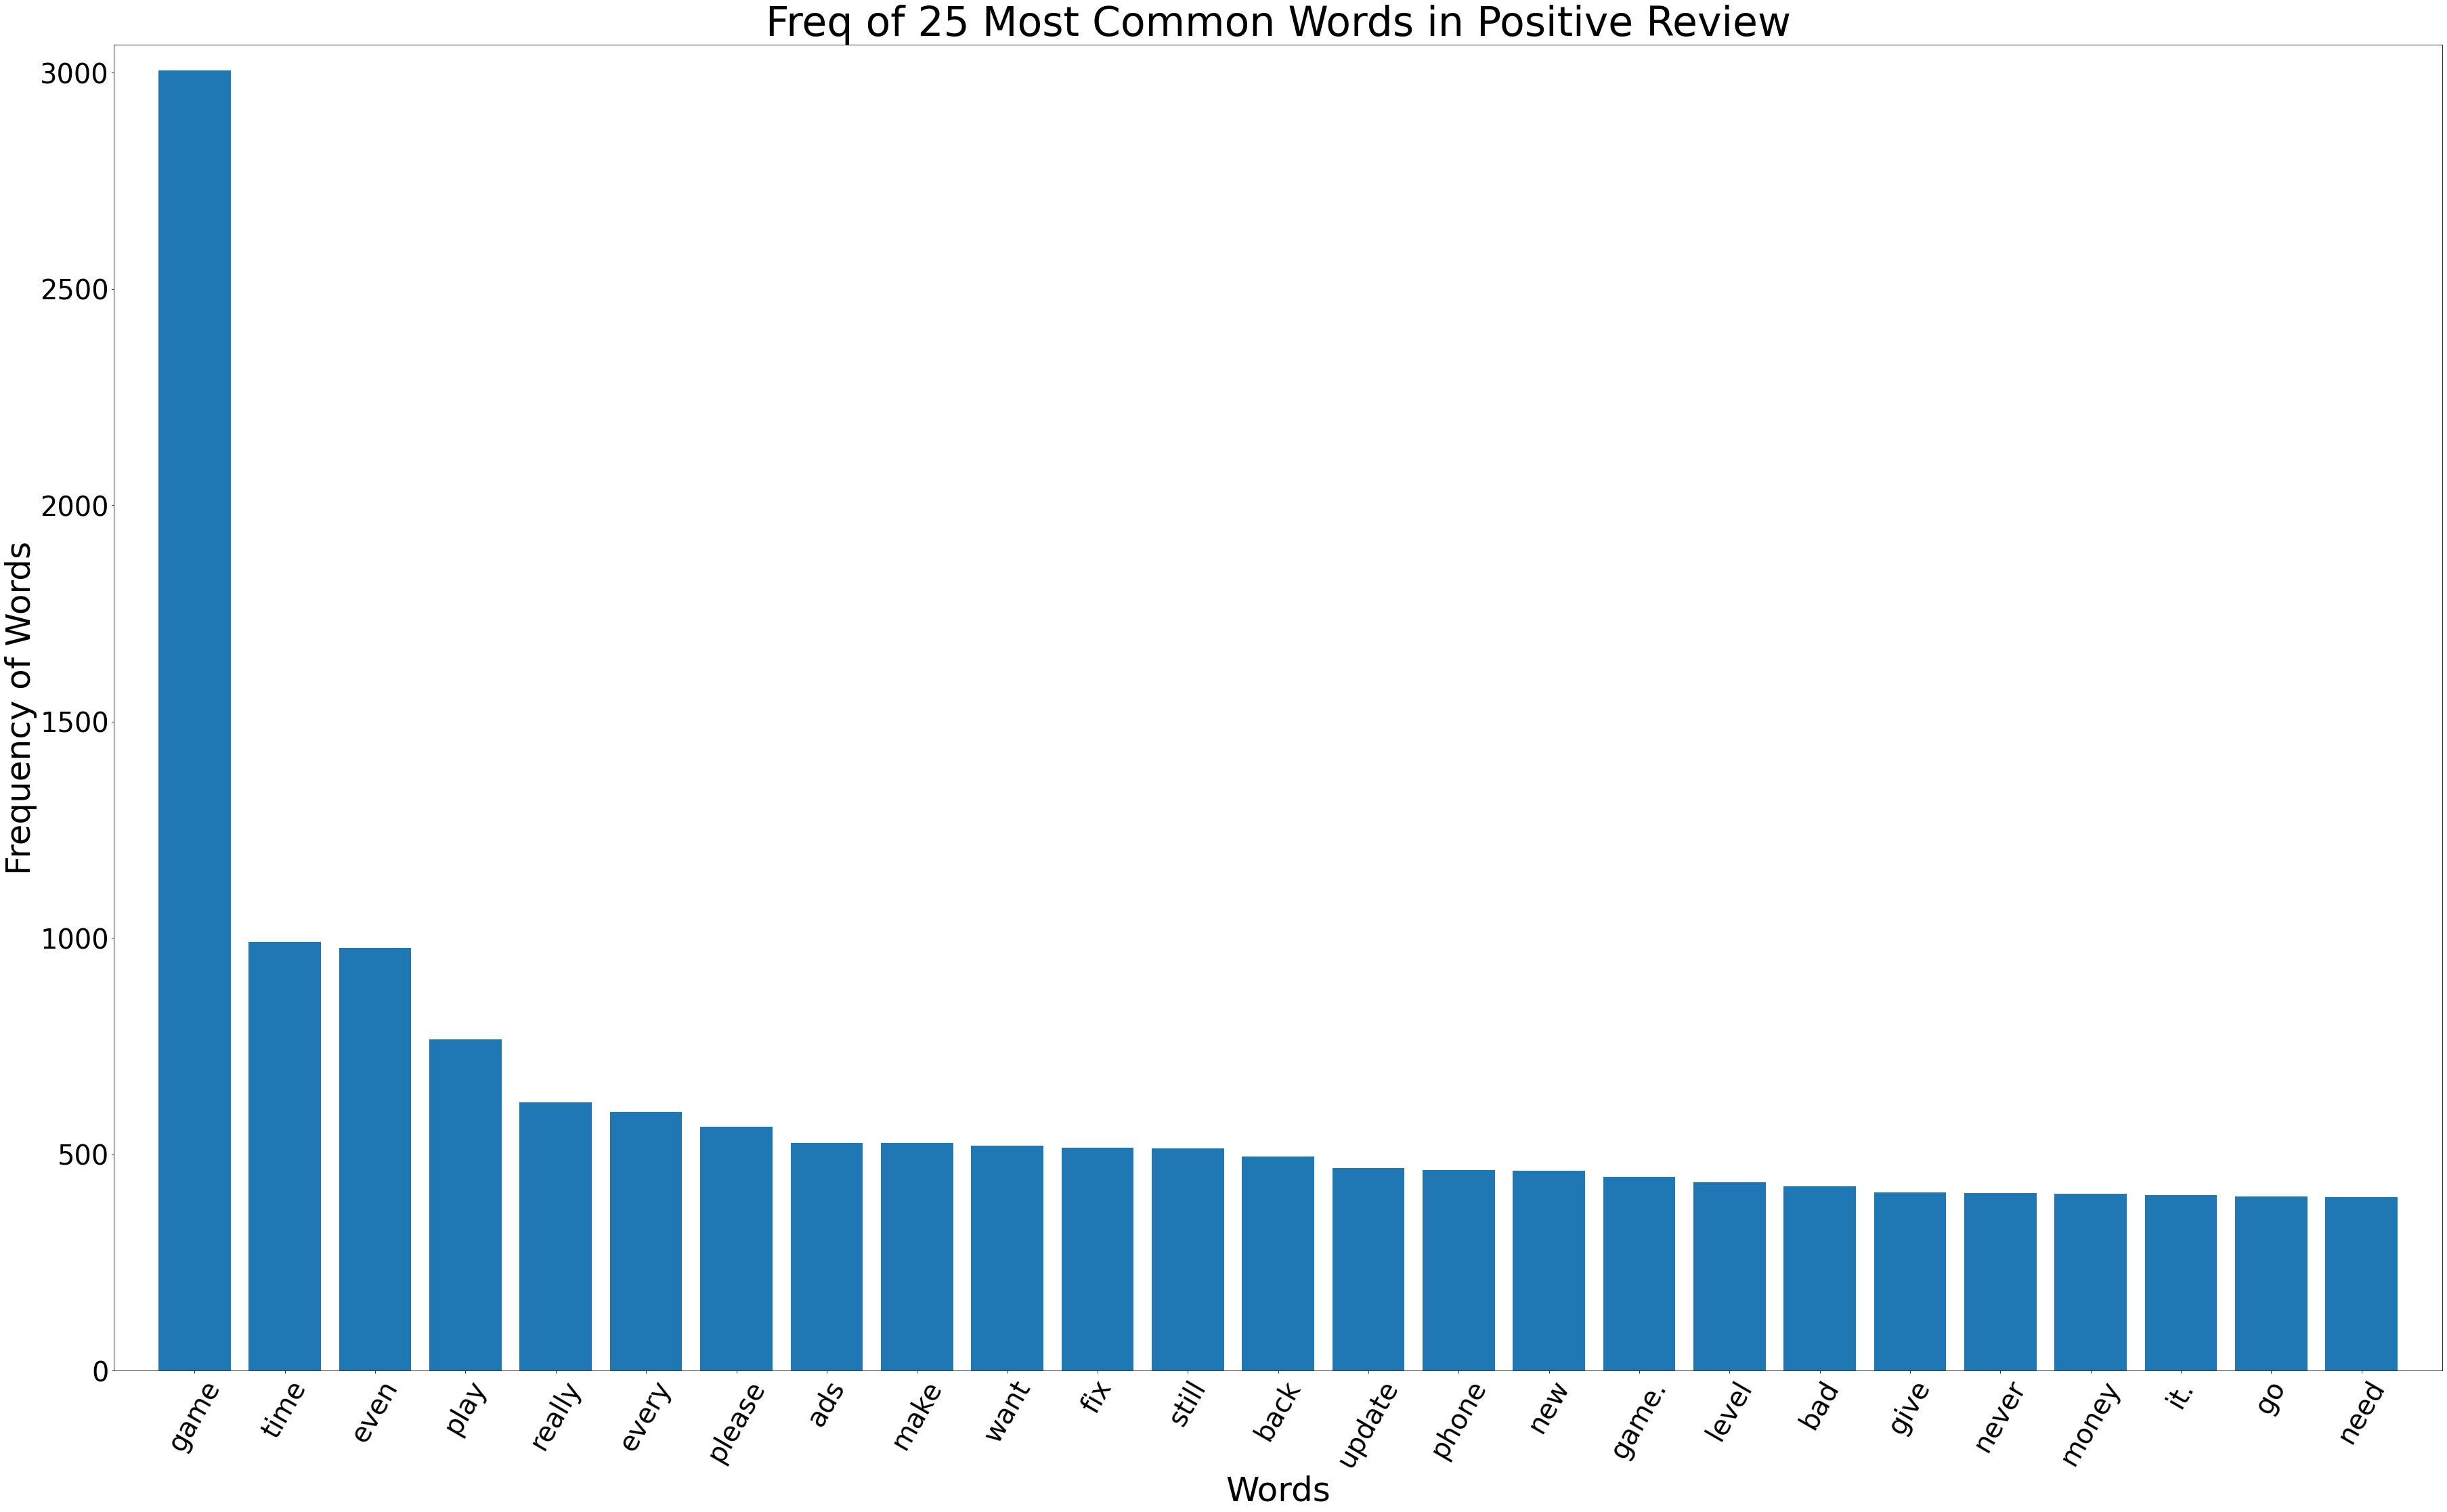

In [37]:
x,y = zip(*Counter(negative_review_dataset).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Positive Review', fontsize=60)
plt.show()